In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('TrainingData.csv', index_col=0)
df.head()

,Function,Use,Sharing,Reporting,Student_Type,Position_Type,Object_Type,Pre_K,Operating_Status,Object_Description,...,Sub_Object_Description,Location_Description,FTE,Function_Description,Facility_or_Department,Position_Extra,Total,Program_Description,Fund_Description,Text_1
134338,Teacher Compensation,Instruction,School Reported,School,NO_LABEL,Teacher,NO_LABEL,NO_LABEL,PreK-12 Operating,NaN,...,NaN,NaN,1.0,NaN,NaN,KINDERGARTEN,50471.810,KINDERGARTEN,General Fund,NaN
206341,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,Non-Operating,CONTRACTOR SERVICES,...,NaN,NaN,NaN,RGN GOB,NaN,UNDESIGNATED,3477.860,BUILDING IMPROVEMENT SERVICES,NaN,BUILDING IMPROVEMENT SERVICES
326408,Teacher Compensation,Instruction,School Reported,School,Unspecified,Teacher,Base Salary/Compensation,Non PreK,PreK-12 Operating,Personal Services - Teachers,...,NaN,NaN,1.0,NaN,NaN,TEACHER,62237.130,Instruction - Regular,General Purpose School,NaN
364634,Substitute Compensation,Instruction,School Reported,School,Unspecified,Substitute,Benefits,NO_LABEL,PreK-12 Operating,EMPLOYEE BENEFITS,...,NaN,NaN,NaN,UNALLOC BUDGETS/SCHOOLS,NaN,PROFESSIONAL-INSTRUCTIONAL,22.300,GENERAL MIDDLE/JUNIOR HIGH SCH,NaN,REGULAR INSTRUCTION
47683,Substitute Compensation,Instruction,School Reported,School,Unspecified,Teacher,Substitute Compensation,NO_LABEL,PreK-12 Operating,TEACHER COVERAGE FOR TEACHER,...,NaN,NaN,NaN,NON-PROJECT,NaN,PROFESSIONAL-INSTRUCTIONAL,54.166,GENERAL HIGH SCHOOL EDUCATION,NaN,REGULAR INSTRUCTION


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400277 entries, 134338 to 415831
Data columns (total 25 columns):
Function                  400277 non-null object
Use                       400277 non-null object
Sharing                   400277 non-null object
Reporting                 400277 non-null object
Student_Type              400277 non-null object
Position_Type             400277 non-null object
Object_Type               400277 non-null object
Pre_K                     400277 non-null object
Operating_Status          400277 non-null object
Object_Description        375493 non-null object
Text_2                    88217 non-null object
SubFund_Description       306855 non-null object
Job_Title_Description     292743 non-null object
Text_3                    179964 non-null object
Text_4                    53746 non-null object
Sub_Object_Description    91603 non-null object
Location_Description      162054 non-null object
FTE                       126071 non-null float64
Func

In [4]:
df.describe()

,FTE,Total
count,126071.000000,3.957220e+05
mean,0.426794,1.310586e+04
std,0.573576,3.682254e+05
min,-0.087551,-8.746631e+07
25%,0.000792,7.379770e+01
50%,0.130927,4.612300e+02
75%,1.000000,3.652662e+03
max,46.800000,1.297000e+08


In [5]:
df.columns

Index(['Function', 'Use', 'Sharing', 'Reporting', 'Student_Type',
       'Position_Type', 'Object_Type', 'Pre_K', 'Operating_Status',
       'Object_Description', 'Text_2', 'SubFund_Description',
       'Job_Title_Description', 'Text_3', 'Text_4', 'Sub_Object_Description',
       'Location_Description', 'FTE', 'Function_Description',
       'Facility_or_Department', 'Position_Extra', 'Total',
       'Program_Description', 'Fund_Description', 'Text_1'],
      dtype='object')

In [6]:
LABELS=['Function', 'Use', 'Sharing', 'Reporting', 'Student_Type',
       'Position_Type', 'Object_Type', 'Pre_K', 'Operating_Status']

In [7]:
df[LABELS].dtypes

Function            object
Use                 object
Sharing             object
Reporting           object
Student_Type        object
Position_Type       object
Object_Type         object
Pre_K               object
Operating_Status    object
dtype: object

In [8]:
df[LABELS] = df[LABELS].apply(lambda x: x.astype('category'))

In [9]:
df[LABELS].dtypes

Function            category
Use                 category
Sharing             category
Reporting           category
Student_Type        category
Position_Type       category
Object_Type         category
Pre_K               category
Operating_Status    category
dtype: object

In [10]:
num_unique_labels = df[LABELS].nunique()
type(num_unique_labels)

pandas.core.series.Series

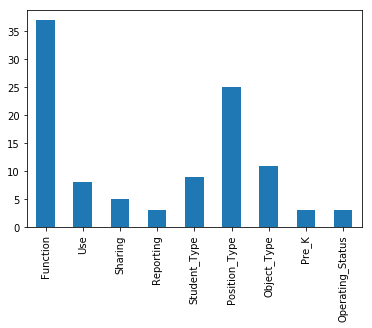

In [11]:
num_unique_labels.plot(kind='bar')
plt.show()

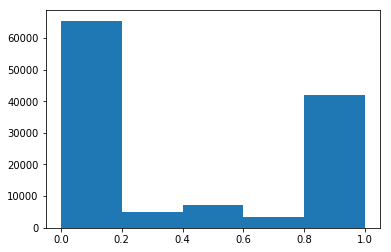

In [12]:
bins=np.linspace(0,1,6)
plt.hist(df['FTE'].dropna(), bins=bins)
plt.show()

In [13]:
#defining log loss function
def compute_log_loss(predicted,actual,eps=1e-14):
    predicted = np.clip(predicted,eps,1-eps)
    loss = -1 * np.mean( actual * np.log(predicted) + (1 - actual) * (np.log(1 - predicted)))
    return loss

In [14]:
compute_log_loss(predicted=0.5, actual=1)

0.69314718055994529

In [15]:
NUMERIC_COLUMNS = ['FTE', 'Total']

In [16]:
numeric_cols_only = df[NUMERIC_COLUMNS].fillna(-1000)
numeric_cols_only.head()

,FTE,Total
134338,1.0,50471.810
206341,-1000.0,3477.860
326408,1.0,62237.130
364634,-1000.0,22.300
47683,-1000.0,54.166


In [17]:
categorical_labels = pd.get_dummies(df[LABELS])
categorical_labels.head()

,Function_Aides Compensation,Function_Career & Academic Counseling,Function_Communications,Function_Curriculum Development,Function_Data Processing & Information Services,Function_Development & Fundraising,Function_Enrichment,Function_Extended Time & Tutoring,Function_Facilities & Maintenance,Function_Facilities Planning,...,Object_Type_Rent/Utilities,Object_Type_Substitute Compensation,Object_Type_Supplies/Materials,Object_Type_Travel & Conferences,Pre_K_NO_LABEL,Pre_K_Non PreK,Pre_K_PreK,Operating_Status_Non-Operating,"Operating_Status_Operating, Not PreK-12",Operating_Status_PreK-12 Operating
134338,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
206341,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
326408,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
364634,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
47683,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1


In [18]:
isinstance(numeric_cols_only, pd.DataFrame)

True

In [19]:
index = categorical_labels.index if isinstance(categorical_labels, pd.DataFrame) else np.arange(categorical_labels.shape[0])

In [20]:
type(index)

pandas.core.indexes.numeric.Int64Index

In [21]:
index.shape

(400277,)

In [22]:
categorical_labels.shape[1] * 5

520

In [23]:
(np.unique(categorical_labels).astype(int) != np.array([0,1])).all()

False

In [24]:
np.array([0,1])

array([0, 1])

In [25]:
categorical_labels.sum(axis=0) < 5

Function_Aides Compensation                            False
Function_Career & Academic Counseling                  False
Function_Communications                                False
Function_Curriculum Development                        False
Function_Data Processing & Information Services        False
Function_Development & Fundraising                     False
Function_Enrichment                                    False
Function_Extended Time & Tutoring                      False
Function_Facilities & Maintenance                      False
Function_Facilities Planning                           False
Function_Finance, Budget, Purchasing & Distribution    False
Function_Food Services                                 False
Function_Governance                                    False
Function_Human Resources                               False
Function_Instructional Materials & Supplies            False
Function_Insurance                                     False
Function_Legal          

In [26]:
categorical_labels.head()

,Function_Aides Compensation,Function_Career & Academic Counseling,Function_Communications,Function_Curriculum Development,Function_Data Processing & Information Services,Function_Development & Fundraising,Function_Enrichment,Function_Extended Time & Tutoring,Function_Facilities & Maintenance,Function_Facilities Planning,...,Object_Type_Rent/Utilities,Object_Type_Substitute Compensation,Object_Type_Supplies/Materials,Object_Type_Travel & Conferences,Pre_K_NO_LABEL,Pre_K_Non PreK,Pre_K_PreK,Operating_Status_Non-Operating,"Operating_Status_Operating, Not PreK-12",Operating_Status_PreK-12 Operating
134338,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
206341,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
326408,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
364634,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
47683,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1


In [27]:
def multilable_sample(y,size=1000,min_count=5,seed=None):
    
    try:
        if (np.unique(y).astype(int) != np.array([0,1])).all():
            raise ValueError()
    except (TypeError, ValueError):
            raise ValueError('multilable_sample works with only binary indicator matrics')
            
    if (y.sum(axis=0) < min_count).any():
            raise ValueError('Some classes do not have enough samples, change min_count if necessary')
            
    if size <= 1:
        size = np.floor(y.shape[0] * size)
    
    if y.shape[1] * min_count > size:
        print('Size less than number of columns * min_count, returning {} items instead of {}.'.format(y.shape[1] * min_count , size))
        size = y.shape[1] * min_count
        
    rng = np.random.RandomState(seed if seed is not None else np.random.randint(1))
    
    if isinstance(y, pd.DataFrame):
        choices = y.index
        y = y.values
    else:
        choices = np.arange(y.shape[0])
        
    sample_idxs = np.array([], dtype=choices.dtype)
    for i in range(y.shape[1]):
        label_choices = choices[y[:,i] == 1]
        label_idxs_sampled = rng.choice(label_choices, size=min_count, replace=False)
        sample_idxs = np.concatenate([label_idxs_sampled,sample_idxs])
    
    #We have minimum 5 label occurances of all type
    sample_idxs = np.unique(sample_idxs)
    
    sample_count = int(size - sample_idxs.shape[0])
    
    remaining_choices = np.setdiff1d(choices,sample_idxs)
    remaining_sampled = rng.choice(remaining_choices, size=sample_count, replace=False)
    
    return np.concatenate([sample_idxs,remaining_sampled])
    
    
    
def multilabel_train_test_split(X,y,size=0.2,min_count=5,seed=None):
    index = y.index if isinstance(y, pd.DataFrame) else np.arange(y.shape[0])
    
    test_set_idx = multilable_sample(y,size=size,min_count=min_count,seed=seed)
    train_set_idx = np.setdiff1d(index,test_set_idx)
    
    test_set_mask = index.isin(test_set_idx)
    train_set_mask = ~test_set_mask
    
    return(X[train_set_mask],X[test_set_mask],y[train_set_mask],y[test_set_mask])

In [28]:
X_train,X_test,y_train,y_test = multilabel_train_test_split(numeric_cols_only,categorical_labels,size=0.2,seed=123)

In [29]:
print('X_train : {} / X_test : {} / y_train : {} / y_test : {} '.format(
    X_train.shape,X_test.shape,y_train.shape,y_test.shape))

X_train : (320222, 2) / X_test : (80055, 2) / y_train : (320222, 104) / y_test : (80055, 104) 


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

In [31]:
clf = OneVsRestClassifier(LogisticRegression())

In [32]:
clf_fit = clf.fit(X_train,y_train)
print('Accuracy : {}'.format(clf_fit.score(X_test,y_test)))

Accuracy : 0.0


In [33]:
predictions = clf_fit.predict_proba(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


In [34]:
predictions.shape

(80055, 104)

In [35]:
predictions_df = pd.DataFrame(columns=pd.get_dummies(df[LABELS]).columns, data=predictions, index=y_test.index)

In [36]:
predictions_df.head()

,Function_Aides Compensation,Function_Career & Academic Counseling,Function_Communications,Function_Curriculum Development,Function_Data Processing & Information Services,Function_Development & Fundraising,Function_Enrichment,Function_Extended Time & Tutoring,Function_Facilities & Maintenance,Function_Facilities Planning,...,Object_Type_Rent/Utilities,Object_Type_Substitute Compensation,Object_Type_Supplies/Materials,Object_Type_Travel & Conferences,Pre_K_NO_LABEL,Pre_K_Non PreK,Pre_K_PreK,Operating_Status_Non-Operating,"Operating_Status_Operating, Not PreK-12",Operating_Status_PreK-12 Operating
206341,0.035848,0.006470,0.000830,0.023918,0.008916,0.000174,0.032078,0.024406,0.052102,0.000048,...,0.010728,0.036952,0.116162,0.017361,0.831233,0.141041,0.027751,0.169607,0.019930,0.810552
275539,0.035883,0.006470,0.000830,0.023922,0.008915,0.000174,0.032085,0.024410,0.052119,0.000048,...,0.010726,0.037619,0.116387,0.017363,0.831181,0.141101,0.027762,0.169575,0.019932,0.810608
330504,0.035886,0.006470,0.000830,0.023922,0.008915,0.000174,0.032085,0.024411,0.052120,0.000048,...,0.010726,0.037663,0.116402,0.017364,0.831177,0.141105,0.027763,0.169573,0.019932,0.810612
18698,0.035885,0.006470,0.000830,0.023922,0.008915,0.000174,0.032085,0.024410,0.052120,0.000048,...,0.010726,0.037647,0.116397,0.017364,0.831178,0.141103,0.027763,0.169574,0.019932,0.810610
291539,0.122566,0.011971,0.001604,0.028673,0.016025,0.019796,0.043998,0.031789,0.114389,0.017295,...,0.005603,0.175223,0.139555,0.016081,0.500542,0.473756,0.099110,0.095665,0.051075,0.928686


In [37]:
predictions_df.to_csv('holdout_predictions.csv')
#score = score_submission(pred_path='holdout_predictions.csv')

In [38]:
df['Position_Extra'].head(50)

134338                   KINDERGARTEN 
206341                    UNDESIGNATED
326408                         TEACHER
364634      PROFESSIONAL-INSTRUCTIONAL
47683       PROFESSIONAL-INSTRUCTIONAL
229958                    UNDESIGNATED
417668          SUPPLIES AND MATERIALS
126378                    UNDESIGNATED
275539      PROFESSIONAL-INSTRUCTIONAL
85262       PROFESSIONAL-INSTRUCTIONAL
304569                             NaN
330504                             NaN
84272                          TEACHER
64760                              NaN
21870                              NaN
18698               DEGREED SUBSTITUTE
169454                             NaN
169914                             NaN
189701                    UNDESIGNATED
43727                              NaN
5614                               NaN
291539      PROFESSIONAL-INSTRUCTIONAL
307038                             NaN
27645                              NaN
126388              SUBSTITUTE TEACHER
14962                  TE

In [39]:
from sklearn.feature_extraction.text import CountVectorizer
import re

In [40]:
TKN_PTRN = '[A-Za-z0-9]+(?=\\s+)'

In [45]:
def combine_columns_text(df, COLS_TO_DROP):
    TEXT = df.drop(COLS_TO_DROP, axis=1)
    TEXT.fillna('',inplace=True)
    return TEXT.apply(lambda x: " ".join(x), axis=1)

In [46]:
NUMERIC_COLS = numeric_cols_only.columns.tolist()
COLS_TO_DROP = set(NUMERIC_COLS + LABELS)
TEXT = combine_columns_text(df,COLS_TO_DROP)
TEXT.head()

134338       Teacher-Elementary        KINDERGARTEN  KIN...
206341    CONTRACTOR SERVICES BOND EXPENDITURES BUILDING...
326408    Personal Services - Teachers   TCHER 2ND GRADE...
364634    EMPLOYEE BENEFITS TEACHER SUBS GENERAL FUND Te...
47683     TEACHER COVERAGE FOR TEACHER TEACHER SUBS GENE...
dtype: object

In [47]:
count_vec = CountVectorizer(token_pattern=TKN_PTRN)

In [48]:
TEXT_features = count_vec.fit_transform(TEXT)
TEXT_features.shape

(400277, 3284)

In [49]:
from sklearn.pipeline import Pipeline

In [51]:
pl = Pipeline([('clf', OneVsRestClassifier(LogisticRegression()))])

In [52]:
pl.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('clf', OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          n_jobs=1))])

In [53]:
accuracy = pl.score(X_test,y_test)
print("The Accuracy score is : {}".format(accuracy))

The Accuracy score is : 0.0


In [54]:
X_train.head()

,FTE,Total
134338,1.0,50471.810
326408,1.0,62237.130
364634,-1000.0,22.300
47683,-1000.0,54.166
229958,-1000.0,-8.150
